The dataset contains information on various demographic and health indicators for different countries. It is organized into several columns, each providing essential information about these countries. Here's a description of each column:

1. **Country :** This column represents the names of different countries or regions included in the dataset. Each row corresponds to a specific country or region, and this column serves as the identifier for each entry.

2. **Life Expectancy Males :** This column contains data on the average life expectancy of males in each of the listed countries. Life expectancy is a crucial health indicator and provides an estimate of the average number of years a male can expect to live, given current mortality rates and health conditions.

3. **Life Expectancy Females :** Similar to the "Life Expectancy Males" column, this column provides data on the average life expectancy of females in the same countries. It reflects the average number of years a female can expect to live, considering the prevailing health and mortality conditions.

4. **Birth Rate :** The "Birth Rate" column contains information about the birth rate in each country. Birth rate is a demographic indicator that represents the number of live births per 1,000 people in a given population over a specific period, usually a year. It can provide insights into a country's population growth or decline.

5. **Death Rate :** This column presents data on the death rate in each of the listed countries. The death rate is another crucial demographic indicator and represents the number of deaths per 1,000 people in a population over a specific period, often a year. It helps gauge the overall health and mortality conditions within a country.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/life-expection/Life expectancy.csv')

In [3]:
df

,Country,Life expectancy males,Life expectancy females,Birth rate,Death rate
0,Hong Kong *,83.2 years,87.9 years,5.0 ‰,6.9 ‰
1,Macao *,82.8 years,87.9 years,10.1 ‰,4.1 ‰
2,Switzerland,81.9 years,85.9 years,10.3 ‰,8.2 ‰
3,Iceland,81.8 years,84.5 years,13.1 ‰,6.3 ‰
4,Norway,81.7 years,84.7 years,10.4 ‰,7.8 ‰
...,...,...,...,...,...
115,Congo (Dem. Republic),57.0 years,61.5 years,42.0 ‰,9.7 ‰
116,Zimbabwe,56.2 years,62.0 years,30.5 ‰,9.1 ‰
117,Somalia,53.2 years,57.4 years,43.6 ‰,11.6 ‰
118,Nigeria,52.3 years,53.1 years,37.1 ‰,13.1 ‰


In [4]:
# df['Birth rate'].unique()

In [5]:
df.shape

(120, 5)

In [6]:
df.columns

Index(['Country', 'Life expectancy males', 'Life expectancy females',
       'Birth rate', 'Death rate'],
      dtype='object')

In [7]:
df.isna().sum()

Country                    0
Life expectancy males      0
Life expectancy females    0
Birth rate                 0
Death rate                 0
dtype: int64

In [8]:
df.isnull().mean()*100

Country                    0.0
Life expectancy males      0.0
Life expectancy females    0.0
Birth rate                 0.0
Death rate                 0.0
dtype: float64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country                  120 non-null    object
 1   Life expectancy males    120 non-null    object
 2   Life expectancy females  120 non-null    object
 3   Birth rate               120 non-null    object
 4   Death rate               120 non-null    object
dtypes: object(5)
memory usage: 4.8+ KB


In [11]:
df.head()

,Country,Life expectancy males,Life expectancy females,Birth rate,Death rate
0,Hong Kong *,83.2 years,87.9 years,5.0 ‰,6.9 ‰
1,Macao *,82.8 years,87.9 years,10.1 ‰,4.1 ‰
2,Switzerland,81.9 years,85.9 years,10.3 ‰,8.2 ‰
3,Iceland,81.8 years,84.5 years,13.1 ‰,6.3 ‰
4,Norway,81.7 years,84.7 years,10.4 ‰,7.8 ‰


In [12]:
df.tail()

,Country,Life expectancy males,Life expectancy females,Birth rate,Death rate
115,Congo (Dem. Republic),57.0 years,61.5 years,42.0 ‰,9.7 ‰
116,Zimbabwe,56.2 years,62.0 years,30.5 ‰,9.1 ‰
117,Somalia,53.2 years,57.4 years,43.6 ‰,11.6 ‰
118,Nigeria,52.3 years,53.1 years,37.1 ‰,13.1 ‰
119,Chad,50.8 years,54.3 years,43.4 ‰,12.5 ‰


In [13]:
df['Life expectancy females'] = df['Life expectancy females'].str.replace(' years','').astype(float)
df['Life expectancy males'] = df['Life expectancy males'].str.replace(' years','').astype(float)

df['Birth rate'] = df['Birth rate'].str.replace(' ‰', '').astype(float)
df['Death rate'] = df['Death rate'].str.replace(' ‰', '').astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  120 non-null    object 
 1   Life expectancy males    120 non-null    float64
 2   Life expectancy females  120 non-null    float64
 3   Birth rate               120 non-null    float64
 4   Death rate               120 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


/tmp/ipykernel_32/1054913128.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Life expectancy males'])


<Axes: xlabel='Life expectancy males', ylabel='Density'>

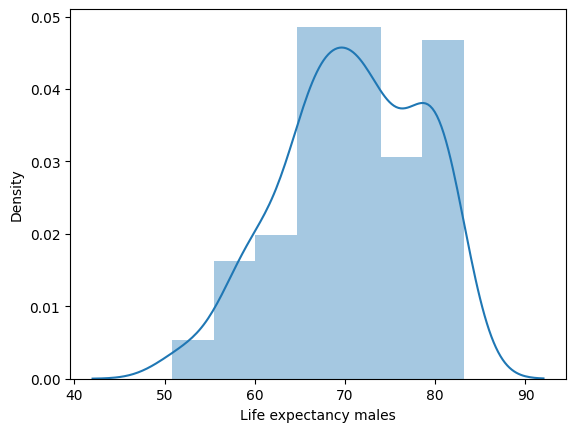

In [15]:
sns.distplot(df['Life expectancy males'])

/tmp/ipykernel_32/3276034187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Life expectancy females'])


<Axes: xlabel='Life expectancy females', ylabel='Density'>

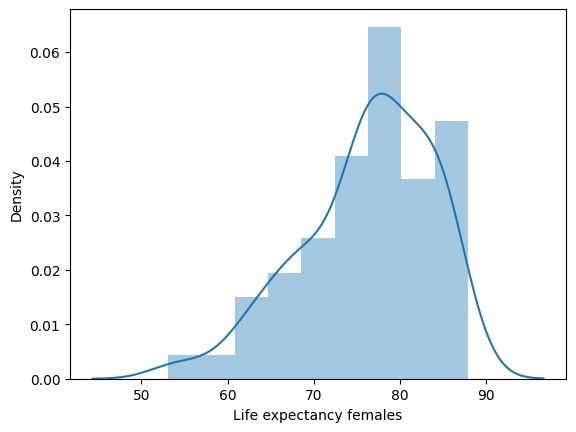

In [16]:
sns.distplot(df['Life expectancy females'])

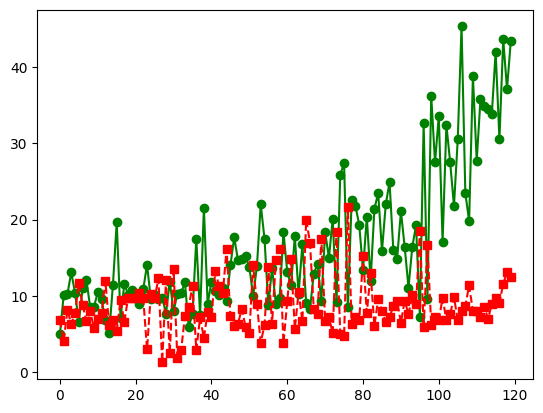

In [17]:
# Plot the first line
plt.plot(df['Birth rate'], label='Birth rate', marker='o', linestyle='-', 
         color='green')

# Plot the second line
plt.plot(df['Death rate'], label='Death rate', marker='s', linestyle='--',
        color='red')

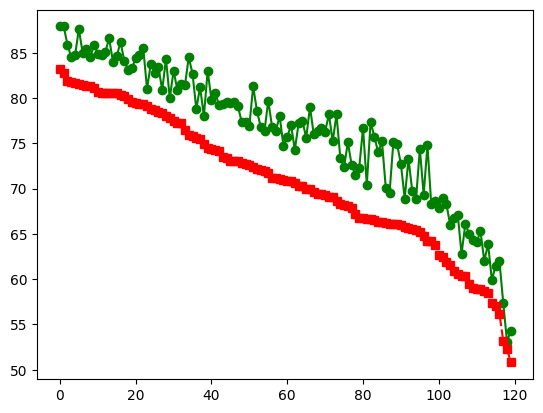

In [18]:
# Plot the first line
plt.plot(df['Life expectancy females'], label='Females', marker='o', 
            linestyle='-', color='green')

# Plot the second line
plt.plot(df['Life expectancy males'], label='Males', marker='s', 
         linestyle='--', color='red')